# Predictive analytics - Optional exercise

The dataset contains data from patients who have suffered a heart attack.

* age : Age of the patient

* sex : Sex of the patient

* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* exng: exercise induced angina (1 = yes; 0 = no)

* caa: number of major vessels (0-3)

* target : no = no heart attack, yes = heart attack

Find a model that predicts if a patient will have a heart attack.


In [220]:
# Load libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Load data with pandas

In [255]:
#Create a data frame from the file separated by ";"
heart = pd.read_csv('heart.csv', sep=';')  

In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'target'],
      dtype='object')

## Data preparation

<Axes: xlabel='target', ylabel='count'>

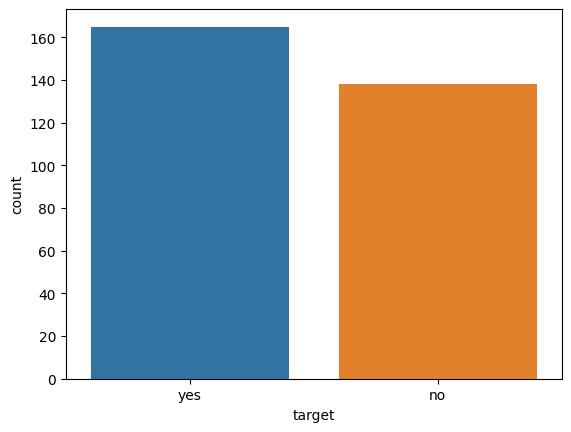

In [19]:
heart_nona = heart.dropna()
sns.countplot(x=heart_nona['target'])

In [256]:
dummies_cp = pd.get_dummies(heart_nona['cp'], prefix='Chest Pain Type')
#dummies_recg = pd.get_dummies(heart_nona['restecg'], prefix='Resting ECG Result')
heart = pd.concat([heart_nona, dummies_cp], axis=1)
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,target,Chest Pain Type_0,Chest Pain Type_1,Chest Pain Type_2,Chest Pain Type_3
0,63,1,3,145,233,1,0,150,0,0,yes,0,0,0,1
1,37,1,2,130,250,0,1,187,0,0,yes,0,0,1,0
2,41,0,1,130,204,0,0,172,0,0,yes,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0,yes,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0,yes,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,no,1,0,0,0
299,45,1,3,110,264,0,1,132,0,0,no,0,0,0,1
300,68,1,0,144,193,1,1,141,0,2,no,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1,no,1,0,0,0


In [257]:
heart = heart.drop(['cp', 'restecg','age','sex' ,'fbs', 'Chest Pain Type_3', 'Chest Pain Type_2', 'Chest Pain Type_1'], axis=1)
heart

,trtbps,chol,thalachh,exng,caa,target,Chest Pain Type_0
0,145,233,150,0,0,yes,0
1,130,250,187,0,0,yes,0
2,130,204,172,0,0,yes,0
3,120,236,178,0,0,yes,0
4,120,354,163,1,0,yes,1
...,...,...,...,...,...,...,...
298,140,241,123,1,0,no,1
299,110,264,132,0,0,no,0
300,144,193,141,0,2,no,1
301,130,131,115,1,1,no,1


## Data analysis

## Preparing train and test or k-fold cross validation

In [258]:
X = heart.drop(columns = ['target'])
y = heart['target']

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify=y)
target_names = y.unique()
feature_columns = X_train.columns

K-Fold Cross Validation

In [260]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 50)
cv_res = cross_val_score(RandomForestClassifier(), X, y, scoring = 'accuracy', cv = kfold)
print("Accuracy in each partition\n", cv_res)
print("Average of accuracy", cv_res.mean())
print("Std of accuracy", cv_res.std())

Accuracy in each partition
 [0.85714286 1.         0.85714286 0.66666667 0.83333333 0.83333333
 0.66666667 1.         0.66666667 0.66666667 1.         0.83333333
 1.         1.         0.83333333 0.33333333 0.83333333 0.66666667
 1.         0.83333333 1.         0.5        0.66666667 0.83333333
 0.83333333 1.         1.         0.83333333 0.5        0.66666667
 0.5        0.66666667 0.83333333 0.83333333 0.66666667 1.
 0.66666667 0.5        0.83333333 1.         0.66666667 0.66666667
 0.66666667 1.         0.5        0.5        0.66666667 0.83333333
 0.83333333 0.66666667]
Average of accuracy 0.7742857142857141
Std of accuracy 0.17282762439813273


## Classification

Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=5000)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

              precision    recall  f1-score   support

         yes       0.78      0.71      0.75        35
          no       0.77      0.83      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



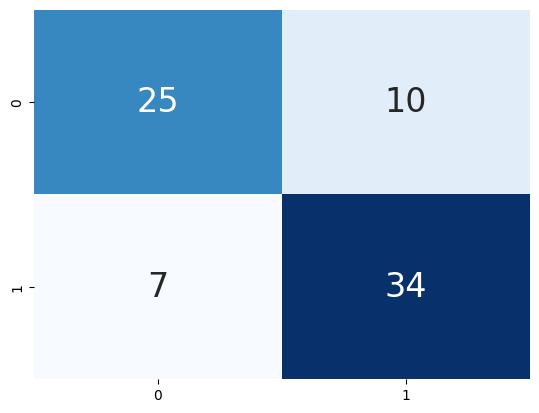

In [262]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

Decision Tree 

In [263]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

              precision    recall  f1-score   support

         yes       0.72      0.66      0.69        35
          no       0.73      0.78      0.75        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



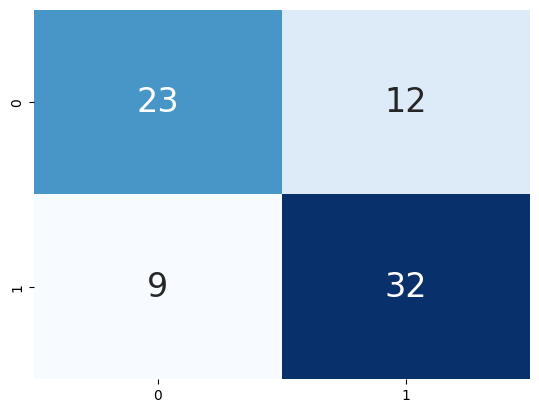

In [264]:
print(classification_report(y_test, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

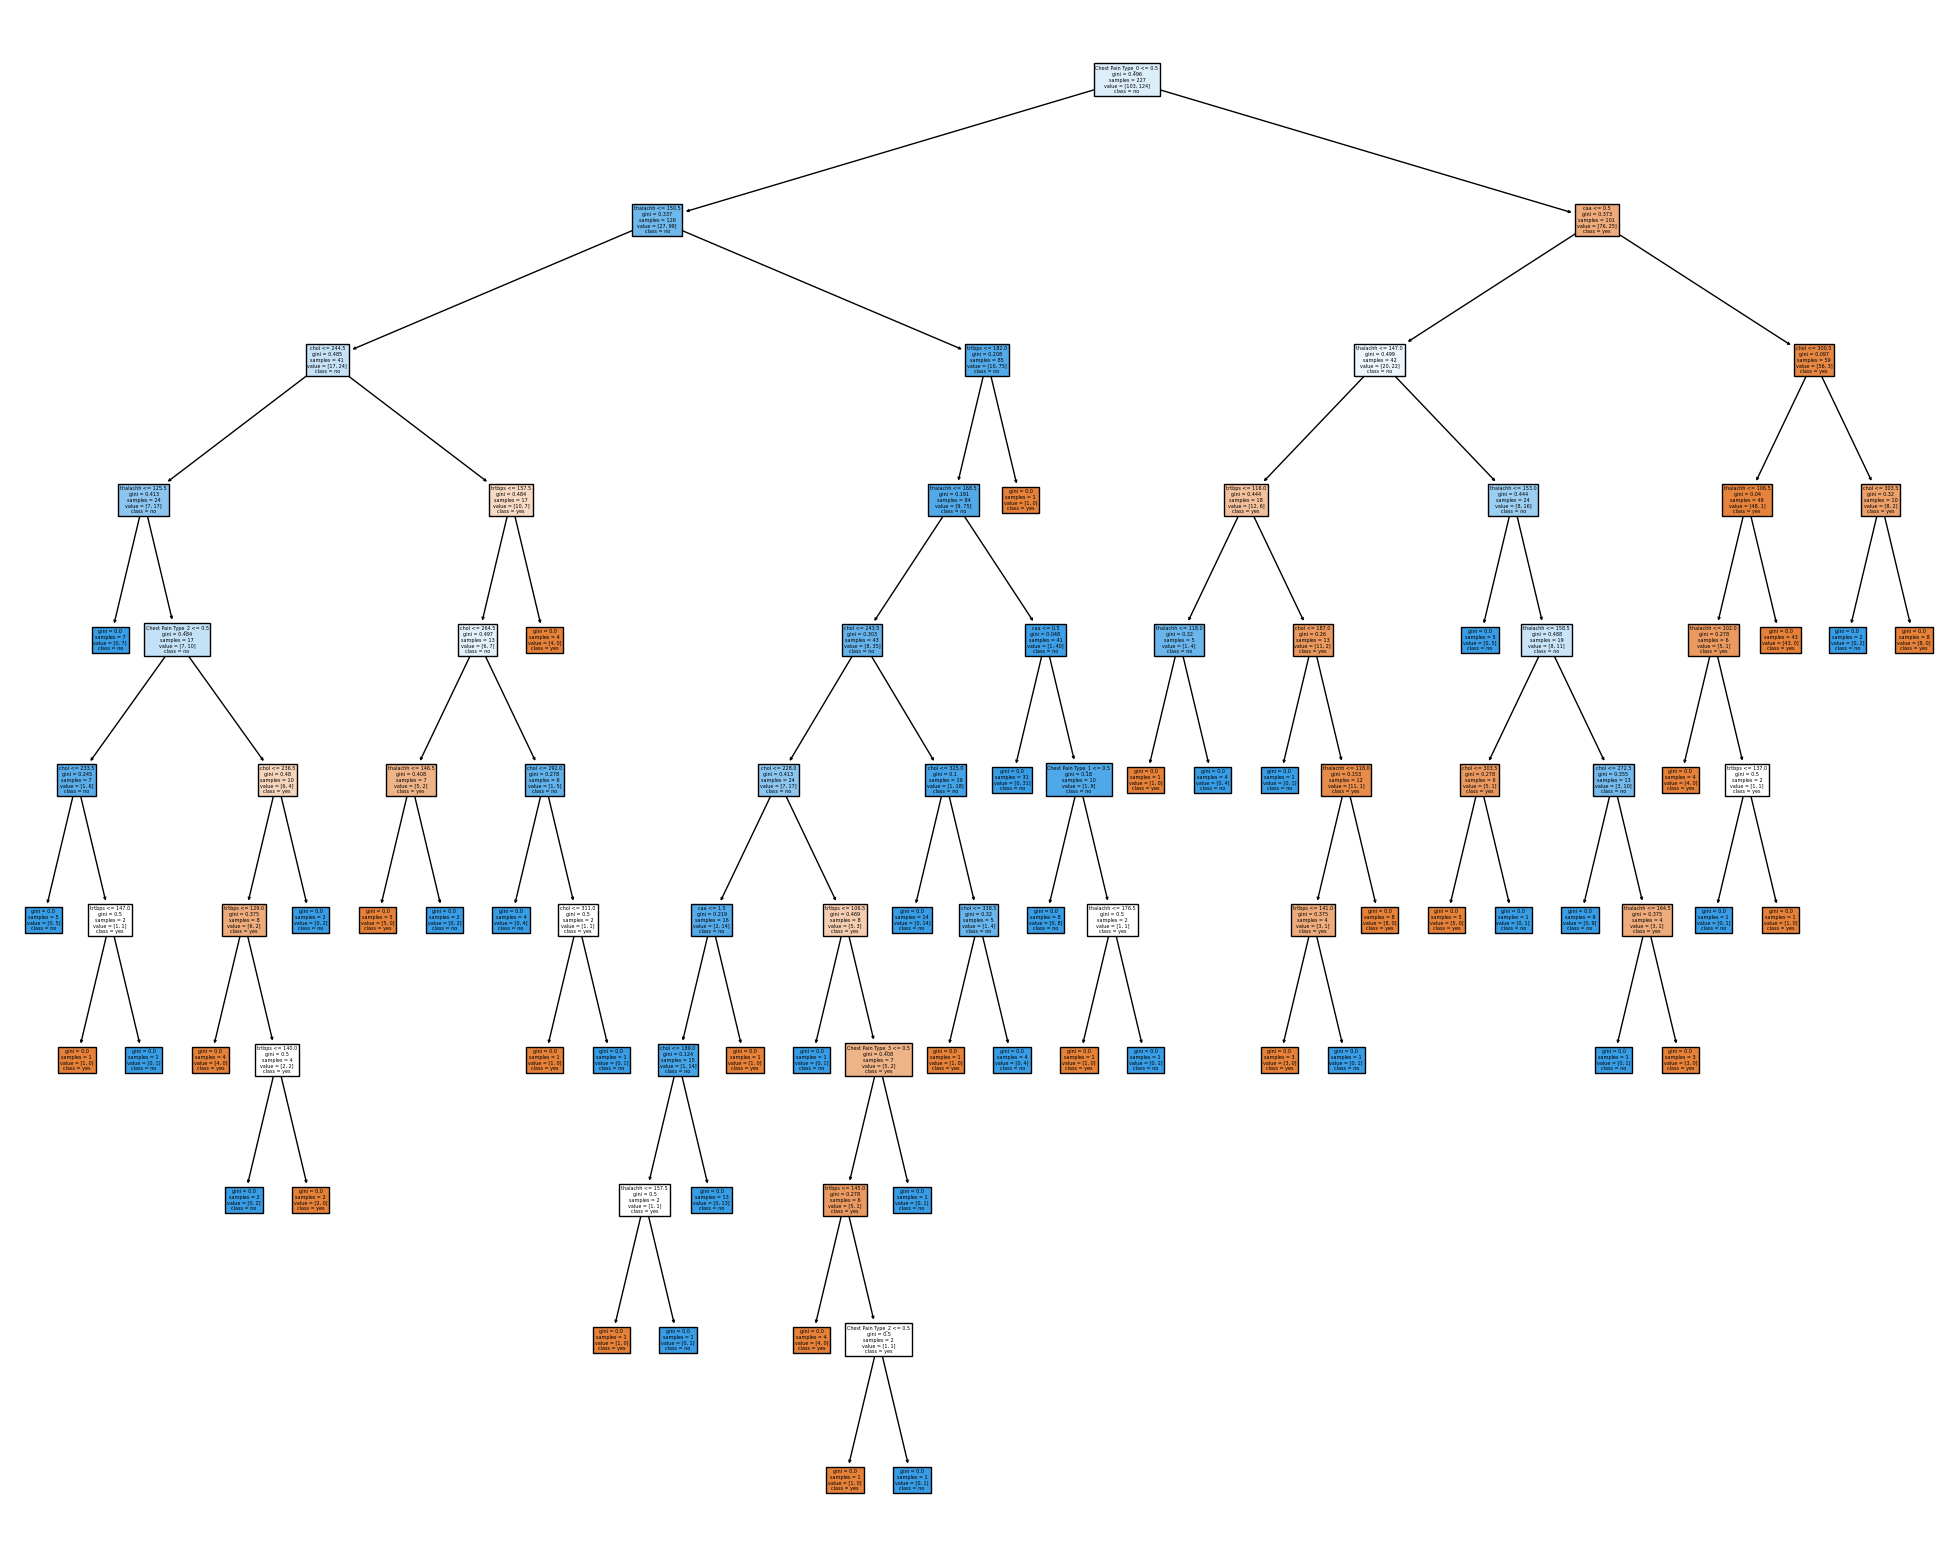

In [231]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT, 
              feature_names=feature_columns,  
              class_names=target_names,
              filled=True)

With knn

In [250]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

              precision    recall  f1-score   support

         yes       0.62      0.66      0.64        35
          no       0.69      0.66      0.68        41

    accuracy                           0.66        76
   macro avg       0.66      0.66      0.66        76
weighted avg       0.66      0.66      0.66        76



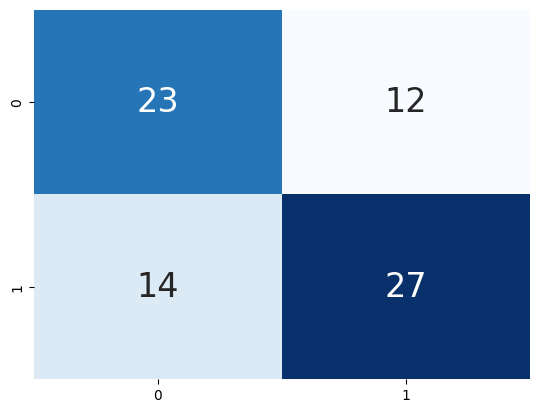

In [251]:
print(classification_report(y_test, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

              precision    recall  f1-score   support

         yes       0.78      0.71      0.75        35
          no       0.77      0.83      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



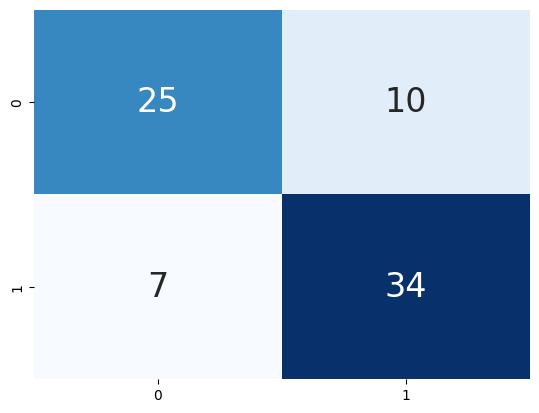

In [266]:
print(classification_report(y_test, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [236]:
for f, i in zip(RF.feature_names_in_, RF.feature_importances_):
  print("Importance of",f,":",i)

Importance of trtbps : 0.17422406461372308
Importance of chol : 0.16960243492500832
Importance of thalachh : 0.27010238854353513
Importance of caa : 0.1569884219184193
Importance of Chest Pain Type_0 : 0.1458008755863019
Importance of Chest Pain Type_1 : 0.027209842993034698
Importance of Chest Pain Type_2 : 0.04287003988914715
Importance of Chest Pain Type_3 : 0.013201931530830407


In [237]:
#We remove the variables from X and regenerate train and test sets
#,'Resting ECG Result_0','Resting ECG Result_1', 'Resting ECG Result_2'
X2 = X.drop(['Chest Pain Type_0', 'Chest Pain Type_1', 'Chest Pain Type_2',	'Chest Pain Type_3'], axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25, random_state = 1, stratify=y)
target_names = y.unique()
feature_columns = X2_train.columns

              precision    recall  f1-score   support

         yes       0.62      0.51      0.56        35
          no       0.64      0.73      0.68        41

    accuracy                           0.63        76
   macro avg       0.63      0.62      0.62        76
weighted avg       0.63      0.63      0.63        76

Importance of sex : 0.07557815609850838
Importance of trtbps : 0.1788684935983756
Importance of chol : 0.1941300160656228
Importance of thalachh : 0.31600720743692146
Importance of caa : 0.20117399019747675
Importance of Resting ECG Result_0 : 0.01728745135557854
Importance of Resting ECG Result_1 : 0.015911654235312364
Importance of Resting ECG Result_2 : 0.001043031012203974


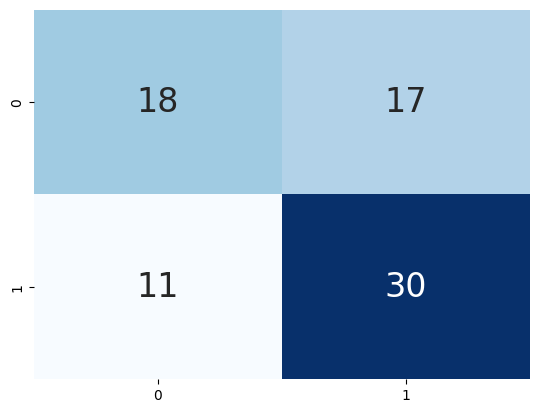

In [204]:
RF = RandomForestClassifier()
RF.fit(X2_train, y2_train)

y_pred = RF.predict(X2_test)
print(classification_report(y2_test, y_pred, target_names=target_names))
sns.heatmap(confusion_matrix(y2_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

for f, i in zip(RF.feature_names_in_, RF.feature_importances_):
  print("Importance of",f,":",i)